In [4]:
import pandas as pd

# Dosyaları oku
books = pd.read_csv("books.csv")
ratings = pd.read_csv("ratings.csv")

# İlk satırlara bakalım
display(books.head())
display(ratings.head())

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653.0,4942365.0,155254.0,66715.0,127936.0,560092.0,1481305.0,2706317.0,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479.0,4800065.0,75867.0,75504.0,101676.0,455024.0,1156318.0,3011543.0,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839.0,3916824.0,95009.0,456191.0,436802.0,793319.0,875073.0,1355439.0,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671.0,3340896.0,72586.0,60427.0,117415.0,446835.0,1001952.0,1714267.0,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664.0,2773745.0,51992.0,86236.0,197621.0,606158.0,936012.0,947718.0,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


,book_id,user_id,rating
0,1,314.0,5.0
1,1,439.0,3.0
2,1,588.0,5.0
3,1,1169.0,4.0
4,1,1185.0,4.0


In [5]:
# Veri boyutları
print(f"📚 Books: {books.shape}")
print(f"⭐ Ratings: {ratings.shape}")

# Eksik veri kontrolü
print("\nEksik veri:")
print(books.isnull().sum())
print(ratings.isnull().sum())

# Ortalama puanlar
avg_ratings = ratings.groupby('book_id')['rating'].mean()
top_books = avg_ratings.sort_values(ascending=False).head(10)
print(top_books)


📚 Books: (6351, 23)
⭐ Ratings: (172777, 3)

Eksik veri:
id                             0
book_id                        0
best_book_id                   0
work_id                        0
books_count                    0
isbn                         353
isbn13                       289
authors                        0
original_publication_year     11
original_title               251
title                          1
language_code                544
average_rating                 1
ratings_count                  1
work_ratings_count             1
work_text_reviews_count        1
ratings_1                      1
ratings_2                      1
ratings_3                      1
ratings_4                      1
ratings_5                      1
image_url                      1
small_image_url                1
dtype: int64
book_id    0
user_id    1
rating     1
dtype: int64
book_id
1308    4.74
862     4.68
1355    4.60
1380    4.59
192     4.56
780     4.55
1029    4.54
1010    4.53
562     

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# TF-IDF ile kitap açıklamalarını vektörleştir
books['description'] = books['authors'] + " " + books['original_title'].fillna("")
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(books['description'])

# Cosine similarity matrisi
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Kitap başlığına göre indeks
indices = pd.Series(books.index, index=books['title']).drop_duplicates()

# Tavsiye fonksiyonu
def recommend(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # kendisini çıkar
    book_indices = [i[0] for i in sim_scores]
    return books['title'].iloc[book_indices]

# Test et
recommend("Harry Potter: Film Wizardry")

,title
3752,"Harry Potter Collection (Harry Potter, #1-6)"
1930,"Castle of Wizardry (The Belgariad, #4)"
421,"Harry Potter Boxset (Harry Potter, #1-7)"
23,Harry Potter and the Goblet of Fire (Harry Pot...
22,Harry Potter and the Chamber of Secrets (Harry...


In [1]:
pip install lightfm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.4/316.4 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lightfm: filename=lightfm-1.17-cp311-cp311-linux_x86_64.whl size=831160 sha256=8089e15fb3d0cfce26f1327f1ee95a16d4e3a41d4c5c02846a95e940edc970de
  Stored in directory: /root/.cache/pip/wheels/b9/0d/8a/0729d2e6e3ca2a898ba55201f905da7db3f838a33df5b3fcdd
Successfully built lightfm


In [7]:
import pandas as pd
from lightfm import LightFM
from lightfm.data import Dataset
from lightfm.evaluation import precision_at_k
import numpy as np

In [8]:
books = pd.read_csv('books.csv')
ratings = pd.read_csv('ratings.csv')

In [9]:
dataset = Dataset()
dataset.fit(ratings['user_id'], ratings['book_id'])

(interactions, weights) = dataset.build_interactions([
    (row['user_id'], row['book_id'], row['rating'])
    for index, row in ratings.iterrows()
])


Dataset Nesnesi Kur + Etkileşim Matrisi Oluştur

In [10]:
model = LightFM(loss='warp')  # Alternatifler: 'logistic', 'bpr'
model.fit(interactions, epochs=10, num_threads=2)


In [11]:
def recommend_books(model, dataset, user_id, books_df, ratings_df, n=5):
    n_users, n_items = dataset.interactions_shape()

    known_books = ratings_df[ratings_df['user_id'] == user_id]['book_id'].tolist()
    all_books = books_df['book_id'].unique()
    unknown_books = [book for book in all_books if book not in known_books]

    user_x = dataset.mapping()[0].get(user_id)
    item_xs = [dataset.mapping()[2].get(book_id) for book_id in unknown_books if book_id in dataset.mapping()[2]]

    scores = model.predict(user_ids=user_x, item_ids=item_xs)
    top_items = np.argsort(-scores)[:n]

    recommended_book_ids = [unknown_books[i] for i in top_items]
    return books_df[books_df['book_id'].isin(recommended_book_ids)][['title', 'authors']]


Kullanıcıya Öneri Fonksiyonu

In [12]:
recommend_books(model, dataset, user_id=42, books_df=books, ratings_df=ratings)


,title,authors
37,The Time Traveler's Wife,Audrey Niffenegger
102,The Count of Monte Cristo,"Alexandre Dumas, Robin Buss"
185,The Other Boleyn Girl (The Plantagenet and Tud...,Philippa Gregory
539,A Little Princess,"Frances Hodgson Burnett, Nancy Bond"
576,Tuck Everlasting,Natalie Babbitt


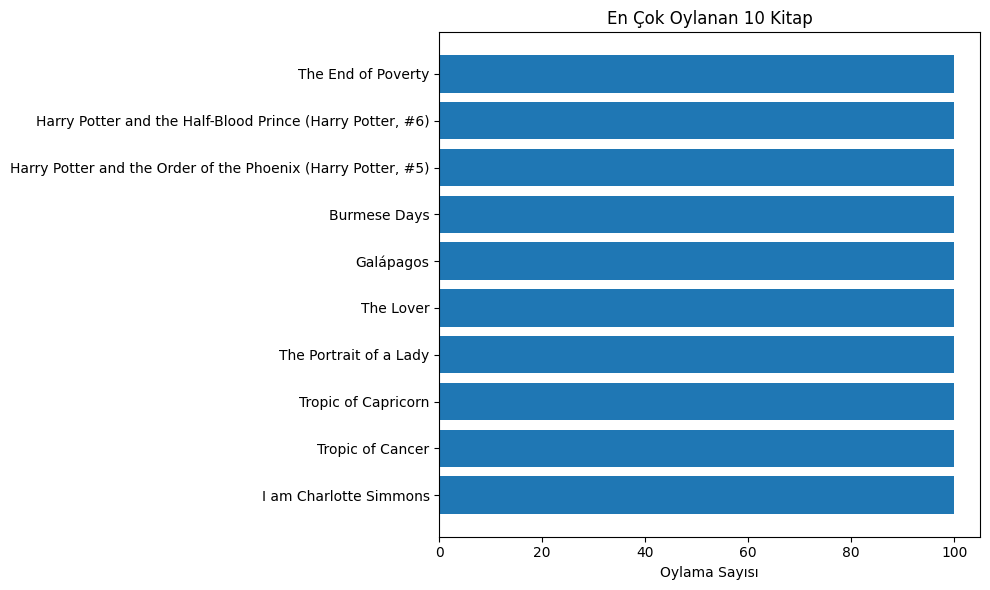

In [13]:
import matplotlib.pyplot as plt

# Kitap başına toplam oylama sayısı
popular = ratings.groupby('book_id').count()['rating'].reset_index()
popular.columns = ['book_id', 'rating_count']

# Kitap bilgileriyle birleştir
popular_books = popular.merge(books[['book_id', 'title']], on='book_id')

# En popüler 10 kitap
top_books = popular_books.sort_values('rating_count', ascending=False).head(10)

# Grafik
plt.figure(figsize=(10,6))
plt.barh(top_books['title'][::-1], top_books['rating_count'][::-1])
plt.title("En Çok Oylanan 10 Kitap")
plt.xlabel("Oylama Sayısı")
plt.tight_layout()
plt.show()
